In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/SVM%20%26%20Prostate%20cancer%20dataset/Prostate_Cancer.csv'
df = pd.read_csv(url,index_col=0)

#https://www.kaggle.com/sajidsaifi/prostate-cancer

# Basic Information (all-features)

## (Before) Normalization-MinMaxScaler/Standardize-StandardScaler

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.8+ KB


In [0]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [0]:
#df.head(10)

In [0]:
#df.tail(10)

In [0]:
df.sample(4)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
98,B,19,27,62,295,0.102,0.053,0.135,0.069
61,B,15,18,65,312,0.113,0.081,0.274,0.070
68,B,18,12,72,394,0.081,0.047,0.152,0.057
4,M,14,16,78,386,0.070,0.284,0.260,0.097


In [0]:
diagnosis_result = pd.get_dummies(df['diagnosis_result'],drop_first=True)
diagnosis_result.rename(columns={'M':'malignant'}, inplace=True) #1 = malignant , 0 = benign

### Plot

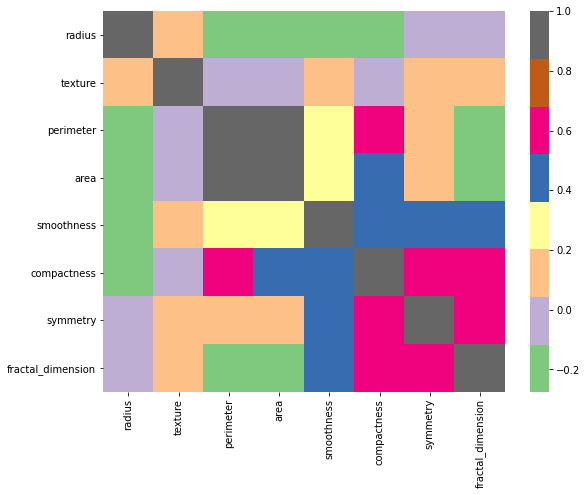

In [0]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent')

In [0]:
#sns.pairplot(df,kind='reg',corner=True)

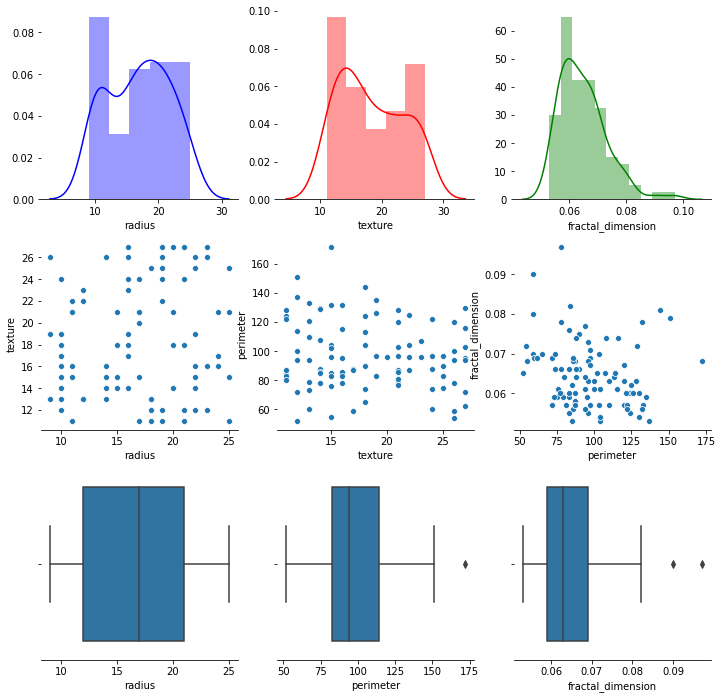

In [0]:
f, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,1], kde=True, color="b", ax=axes[0,0])
sns.distplot(df.iloc[:,2], kde=True, color="r", ax=axes[0,1])
sns.distplot(df.iloc[:,8], kde=True, color="g", ax=axes[0,2])

sns.scatterplot(x=df.iloc[:,1],y=df.iloc[:,2],data=df, ax=axes[1, 0])
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],data=df, ax=axes[1, 1])
sns.scatterplot(x=df.iloc[:,3],y=df.iloc[:,8],data=df, ax=axes[1, 2])

sns.boxplot(df.iloc[:,1],ax=axes[2, 0])
sns.boxplot(df.iloc[:,3],ax=axes[2, 1])
sns.boxplot(df.iloc[:,8],ax=axes[2, 2])

## Normalization-MinMaxScaler

In [0]:
min_max_scaler = MinMaxScaler()
df_norm = min_max_scaler.fit_transform(df.drop(df.columns[0],axis=1))
norm_df = pd.DataFrame(df_norm,columns=df.columns[1:])
norm_df.sample(5)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
28,0.3750,0.2500,0.416667,0.316229,0.520548,0.429967,0.343195,0.272727
51,0.6250,0.6875,0.291667,0.220764,0.095890,0.074919,0.000000,0.159091
90,0.8750,1.0000,0.358333,0.275060,0.273973,0.156352,0.201183,0.136364
80,0.0625,0.4375,0.183333,0.119332,0.547945,0.182410,0.289941,0.386364
56,0.0625,0.5000,0.616667,0.566826,0.479452,0.289902,0.337278,0.159091


## Standardize-StandardScaler

In [0]:
stand_scaler = StandardScaler()
df_stad = stand_scaler.fit_transform(df.drop(df.columns[0],axis=1))
stad_df = pd.DataFrame(df_stad,columns=df.columns[1:])
stad_df.sample(5)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
52,1.678807,-0.625130,-0.882100,-0.832672,-1.354305,-1.293619,-0.201432,-0.454988
68,-0.175090,-0.238053,-1.603742,-1.420522,0.293101,0.235054,0.582095,1.887767
87,0.442876,-1.399285,1.070576,1.172934,-0.873811,-0.093693,0.059744,-1.071502
11,0.030898,-0.625130,0.306485,0.245577,-0.393318,0.037806,-0.299373,-0.454988
48,0.648864,0.536102,-0.797201,-0.798093,0.018533,-0.586813,-0.821724,-0.578290


# sklearn-SVM (all-features)

## Normalization

In [0]:
X_train , X_test,y_train,y_test = train_test_split(norm_df,diagnosis_result,train_size = 0.8,random_state=100)
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc.predict(X_test)

###Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 5,  2],
       [ 2, 11]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)

(0.8, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461)

In [0]:
data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

table_data = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Normalization'])


In [0]:
table_data

,Accuracy,F1 score,Recall,Precision
all-features/Normalization,0.8,0.846154,0.846154,0.846154


## Standardize

### Standarize - Model

In [0]:
X_train , X_test,y_train,y_test = train_test_split(stad_df,diagnosis_result,train_size = 0.8,random_state=100)
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc.predict(X_test)

###Standarize - Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 5,  2],
       [ 2, 11]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)

(0.8, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461)

In [0]:
data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]
table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Standardization'])
table_data = table_data.append(table_data2)

In [0]:
table_data

,Accuracy,F1 score,Recall,Precision
all-features/Normalization,0.8,0.846154,0.846154,0.846154
all-features/Standardization,0.8,0.846154,0.846154,0.846154


###Standardize-Grid search-Model

In [0]:
param_combination = {'C':[0.01,0.1,1,10,100,1000,10000],'gamma':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
grid_search = GridSearchCV(SVC(), param_combination, verbose=1)

In [0]:
grid_search.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

Fitting 5 folds for each of 49 candidates, totalling 245 fits


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [0]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [0]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_grid_search = grid_search.predict(X_test)

###Standardize-Grid search-Model Evaluation

In [0]:
accuracy_score(y_test,y_grid_search),f1_score(y_test,y_grid_search),precision_score(y_test,y_grid_search),recall_score(y_test,y_grid_search)

(0.9, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231)

In [0]:
confusion_matrix(y_test,y_grid_search)

array([[ 6,  1],
       [ 1, 12]])

In [0]:
data = [[accuracy_score(y_test,y_grid_search),f1_score(y_test,y_grid_search),precision_score(y_test,y_grid_search),recall_score(y_test,y_grid_search)]]
table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Standardization/Grid search'])
table_data = table_data.append(table_data2)

In [0]:
table_data

,Accuracy,F1 score,Recall,Precision
all-features/Normalization,0.8,0.846154,0.846154,0.846154
all-features/Standardization,0.8,0.846154,0.846154,0.846154
all-features/Standardization/Grid search,0.9,0.923077,0.923077,0.923077


# Basic Information-Normalization (drop['radius','fractal_dimension'])

In [0]:
norm_df_case1 = norm_df.drop(norm_df.columns[[0,7]],axis=1)

## sklearn-SVM -Normalization (drop['radius','fractal_dimension'])-Model




In [0]:
X_train , X_test,y_train,y_test = train_test_split(norm_df_case1,diagnosis_result,train_size = 0.8,random_state=100)
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc.predict(X_test)

### sklearn-SVM -Normalization (drop['radius','fractal_dimension'])-Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 6,  1],
       [ 1, 12]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)

(0.9, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231)

In [0]:
data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]
table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['drop-features/Normalization'])
table_data = table_data.append(table_data2)

In [0]:
table_data

,Accuracy,F1 score,Recall,Precision
all-features/Normalization,0.8,0.846154,0.846154,0.846154
all-features/Standardization,0.8,0.846154,0.846154,0.846154
all-features/Standardization/Grid search,0.9,0.923077,0.923077,0.923077
drop-features/Normalization,0.9,0.923077,0.923077,0.923077
